In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from tkinter import filedialog as fd

In [32]:
#with open(fd.askopenfilename()) as f:
with open('C:\\Python312\\events.json') as f:
    data = json.load(f)
events_df = pd.DataFrame(pd.json_normalize(data, "events"))

In [33]:
print(pd.Series(events_df['signature']).value_counts())

signature
MALWARE-CNC Win.Trojan.Jadtre variant outbound connection       9
EXPLOIT Remote Windows Win32k elevation of privilege attempt    9
EXPLOIT Java JRE to Oracle WebLogic RCE                         9
NETBIOS DCERPC NCACN-IP-TCP interfaces BO                       9
MALWARE-CNC User-Agent known malicious connecting IP            9
INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306      8
EXPLOIT Multiple IIS 6.0 attempt                                8
EXPLOIT Oracle 9i TNS Listener BO                               8
NETBIOS SMB-DS srvsvc NetrPathCanonicalize BO                   8
Name: count, dtype: int64


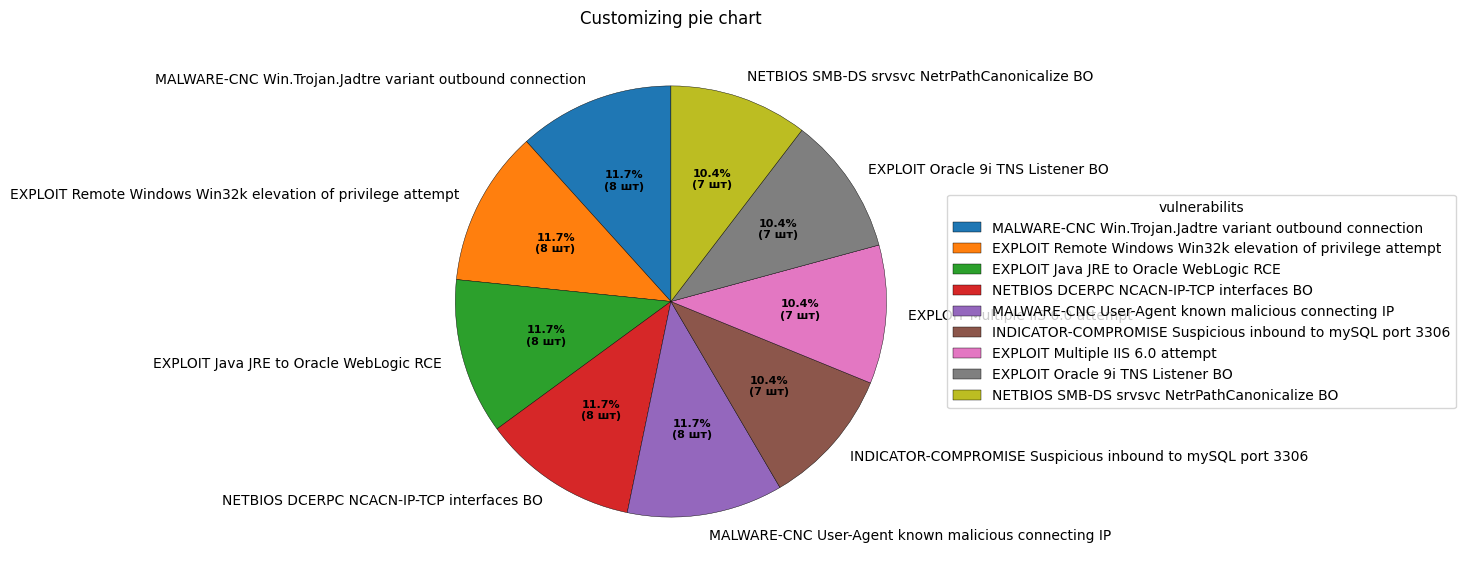

In [34]:
vulnerability = list(events_df['signature'].drop_duplicates())
data = []
for i in events_df['signature'].drop_duplicates():
    data.append(list(events_df['signature']).count(i))
 
wp = {'linewidth': 0.3, 'edgecolor': "black"}
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} шт)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), labels=vulnerability,
                                  startangle=90, wedgeprops=wp, textprops=dict(color="black"))
 
ax.legend(wedges, vulnerability, title="vulnerabilits", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Customizing pie chart")
 
plt.show()